In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import matplotlib.tri as tri
from dataset import *

In [2]:
df = pd.read_pickle('microstucture_big_NU_2.pkl')
df.head()

,curve_n,curve_area,sizes,ratios,roundness,damage,shrinkage,stiffness_ratio,aggregate_ratio,curve_16,curve_8,curve_4,mortar_damage,interface,stiffness_1,stiffness_2,damage_profile,volume_profile
0,"[1, 13, 0]","[105.80074636770647, 227.96328911964014, 0.0]","{16: [[12.156105356917523, 10.623884723487098]...","{16: [1.1442241395977328], 8: [1.4751999563701...","{16: [0.79153385961529], 8: [0.605976146544928...",0.117857,-0.000244,0.651470,0.325941,0.316993,0.683007,0.0,0.285195,947,28792.557120,13619.720936,"[3.113644561381079e-05, 3.7948484532535076e-05...","[0.002040608087554574, 0.0019385777413845062, ..."
1,"[4, 0, 0]","[278.0806039902927, 0.0, 0.0]","{16: [[13.2100775605406, 8.901632629103986], [...","{16: [1.4840061493158128, 1.1343764452308507, ...","{16: [0.7175189460203348, 0.8022948062440893, ...",0.121404,-0.000245,0.639379,0.271563,1.000000,0.000000,0.0,0.240921,534,28536.318541,14767.479300,"[7.565638952655718e-05, 5.698917811969295e-05,...","[0.0031629425939172506, 0.003060912247747183, ..."
2,"[4, 0, 0]","[313.421728531106, 0.0, 0.0]","{16: [[14.478128114885118, 7.07690334800868], ...","{16: [2.045828154338015, 1.7307378409831589, 1...","{16: [0.7837420397213821, 0.7111899015206651, ...",0.135963,-0.000244,0.676005,0.306076,1.000000,0.000000,0.0,0.245848,546,29279.565811,14861.128628,"[4.778217407874763e-05, 7.891416316851974e-05,...","[0.002040608087554574, 0.002040608087554574, 0..."
3,"[3, 10, 0]","[218.03944019512616, 173.47923426585353, 0.0]","{16: [[10.690182333262214, 9.950449294945646],...","{16: [1.0743416720581973, 1.5227016310172952, ...","{16: [0.8521819843178768, 0.7467008904049787, ...",0.157220,-0.000214,0.674684,0.382342,0.556907,0.443093,0.0,0.340982,970,29910.918474,13129.440844,"[3.2994332286762074e-05, 0.0001448570692446082...","[0.0035710642114281654, 0.004081216175109148, ..."
4,"[4, 5, 0]","[299.7357110559889, 69.95675483906378, 0.0]","{16: [[11.825311336277718, 7.229526295980998],...","{16: [1.6356965660186595, 2.5639894808309918, ...","{16: [0.7855563249650631, 0.4722256149583713, ...",0.129655,-0.000222,0.643299,0.361028,0.810770,0.189230,0.0,0.299074,812,29702.010155,13586.350679,"[4.9421887524658814e-05, 6.094192576711066e-05...","[0.003775124903768301, 0.0036730945575982332, ..."


In [3]:
df_n = pd.read_pickle('microstucture_big_NU.pkl')
df_n.head()

,curve_n,curve_area,sizes,ratios,roundness,damage,shrinkage,stiffness_ratio,aggregate_ratio,curve_16,curve_8,curve_4,mortar_damage,damage_profile,volume_profile
0,"[1, 13, 0]","[105.80074636770647, 227.96328911964014, 0.0]","{16: [[12.156105356917523, 10.623884723487098]...","{16: [1.1442241395977328], 8: [1.4751999563701...","{16: [0.79153385961529], 8: [0.605976146544928...",0.124488,-0.000233,0.701233,0.325941,0.316993,0.683007,0.0,0.285195,"[3.1146348192123696e-05, 3.798499164986424e-05...","[0.002040608087554574, 0.0019385777413845062, ..."
1,"[4, 0, 0]","[278.0806039902927, 0.0, 0.0]","{16: [[13.2100775605406, 8.901632629103986], [...","{16: [1.4840061493158128, 1.1343764452308507, ...","{16: [0.7175189460203348, 0.8022948062440893, ...",0.107501,-0.000236,0.687639,0.271563,1.000000,0.000000,0.0,0.240921,"[7.562357495771721e-05, 5.696863809134811e-05,...","[0.0031629425939172506, 0.003060912247747183, ..."
2,"[4, 0, 0]","[313.421728531106, 0.0, 0.0]","{16: [[14.478128114885118, 7.07690334800868], ...","{16: [2.045828154338015, 1.7307378409831589, 1...","{16: [0.7837420397213821, 0.7111899015206651, ...",0.125191,-0.000230,0.728256,0.306076,1.000000,0.000000,0.0,0.245848,"[4.7766483476152644e-05, 7.882997306296602e-05...","[0.002040608087554574, 0.002040608087554574, 0..."
3,"[3, 10, 0]","[218.03944019512616, 173.47923426585353, 0.0]","{16: [[10.690182333262214, 9.950449294945646],...","{16: [1.0743416720581973, 1.5227016310172952, ...","{16: [0.8521819843178768, 0.7467008904049787, ...",0.125588,-0.000203,0.682841,0.382342,0.556907,0.443093,0.0,0.340982,"[3.2990854379022494e-05, 0.0001448042021365836...","[0.0035710642114281654, 0.004081216175109148, ..."
4,"[4, 5, 0]","[299.7357110559889, 69.95675483906378, 0.0]","{16: [[11.825311336277718, 7.229526295980998],...","{16: [1.6356965660186595, 2.5639894808309918, ...","{16: [0.7855563249650631, 0.4722256149583713, ...",0.115385,-0.000211,0.682706,0.361028,0.810770,0.189230,0.0,0.299074,"[4.947499110130593e-05, 6.096927972976118e-05,...","[0.003775124903768301, 0.0036730945575982332, ..."


In [17]:
damage = np.stack(df['damage_profile'].to_numpy())
volume = np.stack(df['volume_profile'].to_numpy())
df['aggregate_ratio'] = volume.sum(axis=1)
df['damage'] = damage.sum(axis=1)

In [5]:
ids_0 = np.arange(len(df))
ids_5 = np.argwhere(volume[:,-5:].sum(axis=1)==0).flatten()
ids_10 = np.argwhere(volume[:,-10:].sum(axis=1)==0).flatten()
ids_15 = np.argwhere(volume[:,-15:].sum(axis=1)==0).flatten()
ids_20 = np.argwhere(volume[:,-20:].sum(axis=1)==0).flatten()
ids_25 = np.argwhere(volume[:,-25:].sum(axis=1)==0).flatten()
ids_30 = np.argwhere(volume[:,-30:].sum(axis=1)==0).flatten()

ids = [ids_0, ids_5, ids_10, ids_15, ids_20, ids_25, ids_30]

In [6]:
for i in range(len(ids)):
    for j in range(i+1, len(ids)):
        ids[i] = np.setdiff1d(ids[i], ids[j])

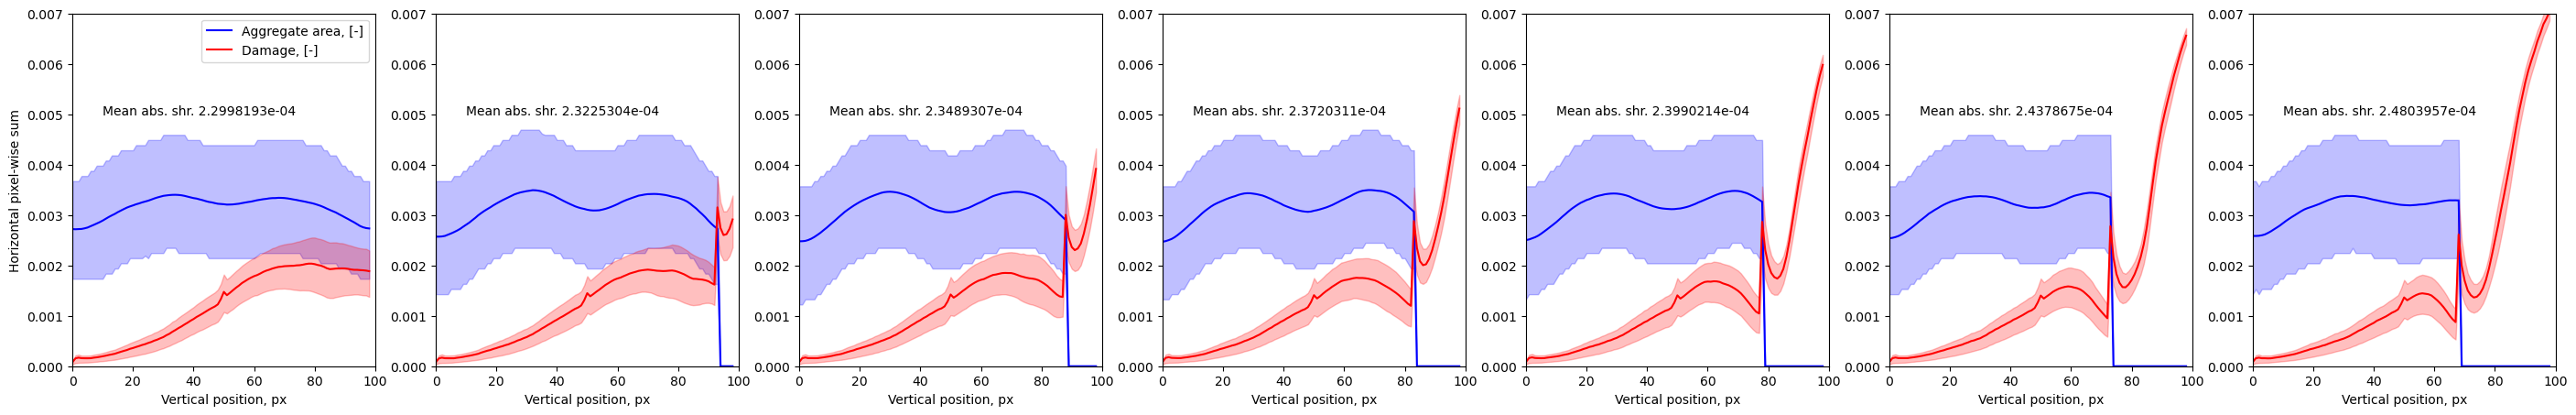

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(35, 5))
for i in range(7):
    ax[i].plot(volume[ids[i]].mean(axis=0), c='blue')
    ax[i].plot((damage[ids[i]]).mean(axis=0), c='red')
    ax[i].fill_between(np.arange(99), np.quantile(volume[ids[i]], 0.25, axis=0), np.quantile(volume[ids[i]], 0.75, axis=0), color='blue', alpha=0.25)
    ax[i].fill_between(np.arange(99), np.quantile(damage[ids[i]], 0.25, axis=0), np.quantile(damage[ids[i]], 0.75, axis=0), color='red', alpha=0.25)
    ax[i].set_xlim([0, 100])
    ax[i].set_ylim([0, 0.007])
    ax[i].set_xlabel('Vertical position, px')
    ax[i].text(10, 0.005, f'Mean abs. shr. {-(df["shrinkage"][ids[i]]).mean():1.7e}', color='black', ha='left', fontsize=10)
ax[0].set_ylabel('Horizontal pixel-wise sum')
ax[0].legend(['Aggregate area, [-]', 'Damage, [-]'])

In [49]:
mean_shr = []
mean_vol = []
mean_damage = []
for i in range(7):
    mean_shr.append(-df['shrinkage'][ids[i]].mean())
    mean_vol.append(df['aggregate_ratio'][ids[i]].mean())
    mean_damage.append(df['damage'][ids[i]].mean())

In [50]:
volumes = np.linspace(min(mean_vol), max(mean_vol), 10)
shr_hist =[]
dam_hist =[]
for i in range(9):
    shr_hist.append(-df_n[(df_n['aggregate_ratio']>volumes[i]) & (df_n['aggregate_ratio']<volumes[i+1])]['shrinkage'].mean())
    dam_hist.append(df_n[(df_n['aggregate_ratio']>volumes[i]) & (df_n['aggregate_ratio']<volumes[i+1])]['damage'].mean())

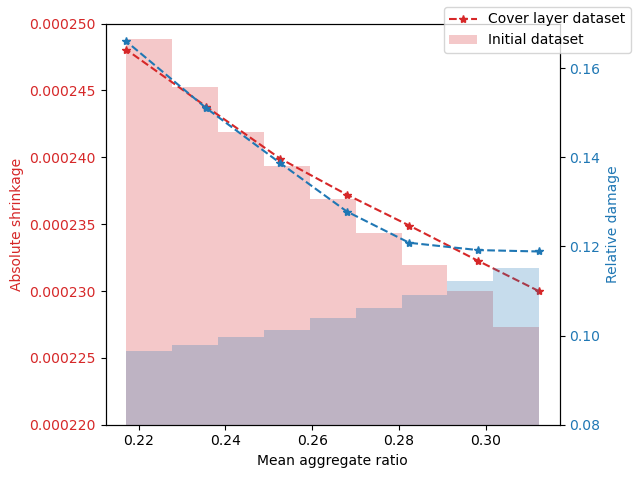

In [66]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Mean aggregate ratio')
ax1.set_ylabel('Absolute shrinkage', color=color)
ax1.plot(mean_vol, mean_shr, '--*', color=color)
ax1.bar(volumes[:-1], shr_hist, width=volumes[1]-volumes[0], align='edge',color=color, alpha=0.25)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.00022, 0.00025])

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Relative damage', color=color)  # we already handled the x-label with ax1
ax2.plot(mean_vol, mean_damage, '--*', color=color)
ax2.bar(volumes[:-1], dam_hist, width=volumes[1]-volumes[0], align='edge',color=color, alpha=0.25)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0.08, 0.17])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(['Cover layer dataset', 'Initial dataset'])
plt.show()

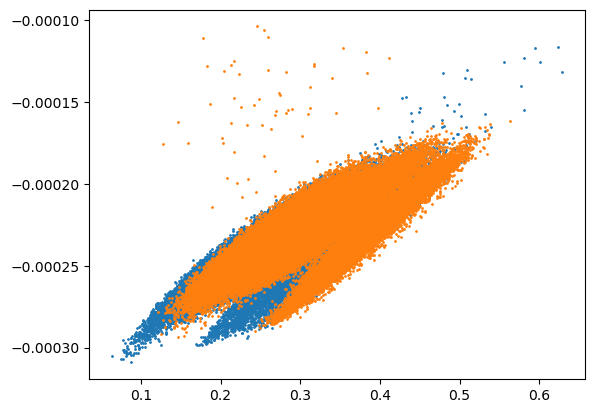

In [12]:
plt.scatter(df['aggregate_ratio'], df['shrinkage'], s=1)
plt.scatter(df_n['aggregate_ratio'], df_n['shrinkage'], s=1)

In [13]:
df_n['aggregate_ratio'].min()

0.12131760805812408

In [124]:
cluster_1 = df[(df['curve_8']==0) & (df['curve_4']==0)]
cluster_1 = cluster_1.reset_index(drop=True)

In [125]:
damage = np.stack(cluster_1['damage_profile'].to_numpy())
volume = np.stack(cluster_1['volume_profile'].to_numpy())

In [126]:
ids_0 = np.argwhere(volume[:,-1]!=0).flatten()
ids_5 = np.argwhere(volume[:,-5:].sum(axis=1)==0).flatten()
ids_10 = np.argwhere(volume[:,-10:].sum(axis=1)==0).flatten()
ids_15 = np.argwhere(volume[:,-15:].sum(axis=1)==0).flatten()
ids_20 = np.argwhere(volume[:,-20:].sum(axis=1)==0).flatten()
ids_25 = np.argwhere(volume[:,-25:].sum(axis=1)==0).flatten()

ids = [ids_5, ids_10, ids_15, ids_20, ids_25]

In [127]:
for i in range(len(ids)):
    for j in range(i+1, len(ids)):
        ids[i] = np.setdiff1d(ids[i], ids[j])
ids = [ids_0] + ids

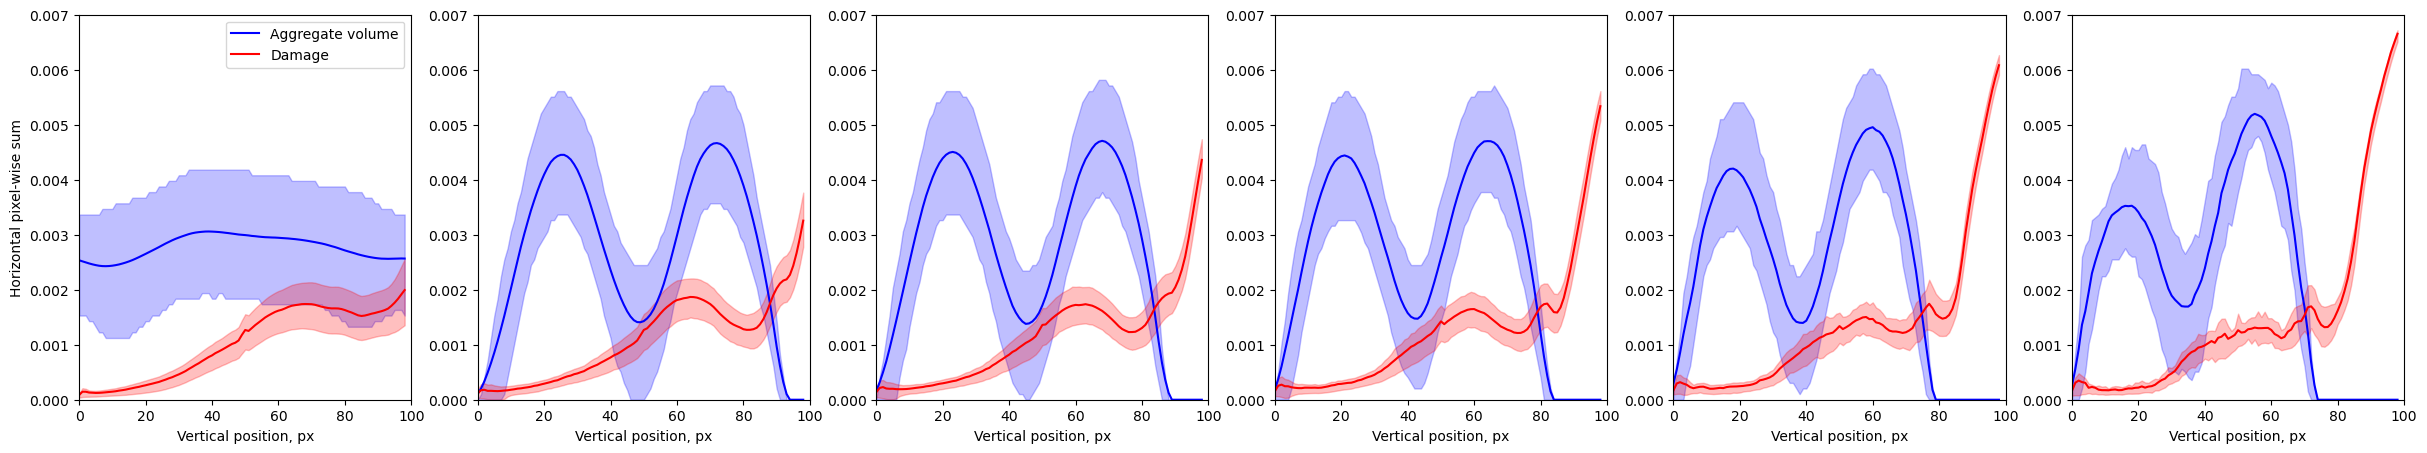

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(30, 5))
for i in range(6):
    ax[i].plot(volume[ids[i]].mean(axis=0), c='blue')
    ax[i].plot(damage[ids[i]].mean(axis=0), c='red')
    ax[i].fill_between(np.arange(99), np.quantile(volume[ids[i]], 0.25, axis=0), np.quantile(volume[ids[i]], 0.75, axis=0), color='blue', alpha=0.25)
    ax[i].fill_between(np.arange(99), np.quantile(damage[ids[i]], 0.25, axis=0), np.quantile(damage[ids[i]], 0.75, axis=0), color='red', alpha=0.25)
    ax[i].set_xlim([0, 100])
    ax[i].set_ylim([0, 0.007])
    ax[i].set_xlabel('Vertical position, px')
    #ax[i].text(20, 0.0065, f'Avg. shr. = {cluster_1["shrinkage"][ids[i]].mean():1.7e}')
ax[0].set_ylabel('Horizontal pixel-wise sum')
ax[0].legend(['Aggregate volume', 'Damage'])

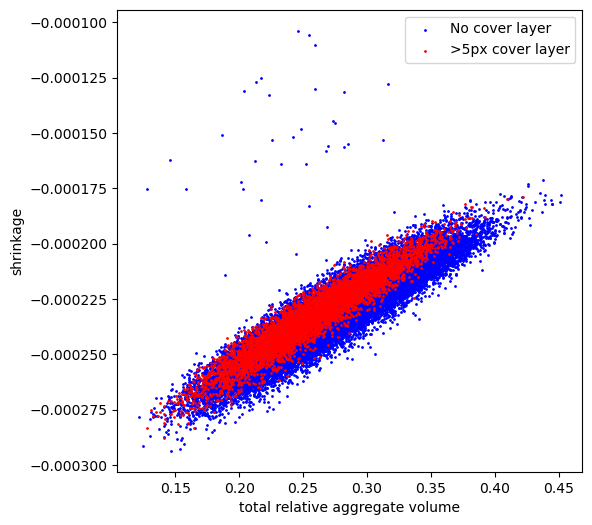

In [129]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(cluster_1['aggregate_ratio'][ids[0]], cluster_1['shrinkage'][ids[0]], s=1, c='blue')
for i in range(1,6):
    plt.scatter(cluster_1['aggregate_ratio'][ids[i]], cluster_1['shrinkage'][ids[i]], s=1, c='red')
ax.set_xlabel('total relative aggregate volume')
ax.set_ylabel('shrinkage')
ax.legend(['No cover layer', '>5px cover layer'])

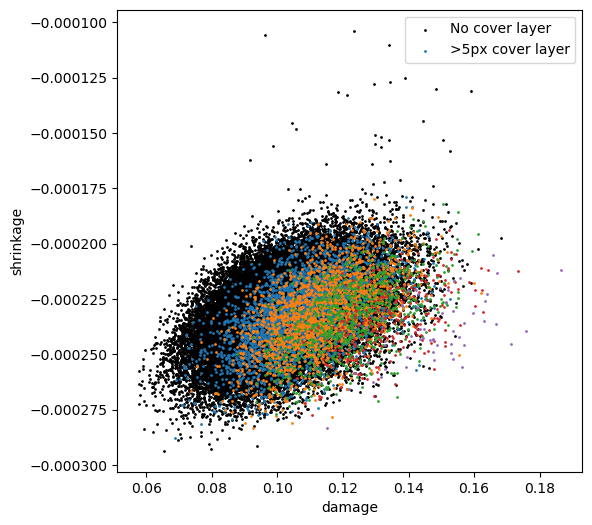

In [140]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(cluster_1['damage'][ids[0]], cluster_1['shrinkage'][ids[0]], s=1, c='black')
for i in range(1,6):
    plt.scatter(cluster_1['damage'][ids[i]], cluster_1['shrinkage'][ids[i]], s=1)
ax.set_xlabel('damage')
ax.set_ylabel('shrinkage')
ax.legend(['No cover layer', '>5px cover layer'])

In [156]:
X = np.array(cluster_1[['aggregate_ratio']])
Y = np.array(cluster_1[['shrinkage']]) / (0.0001)
reg1 = LinearRegression().fit(X, Y)
x = np.linspace(0, 1, 10)
y = reg1.predict(x.reshape(-1,1)) * (0.0001)
print(reg1.score(X, Y))
a = reg1.coef_
b = reg1.intercept_

0.9373827119665216


Text(0, 0.5, 'shrinkage')

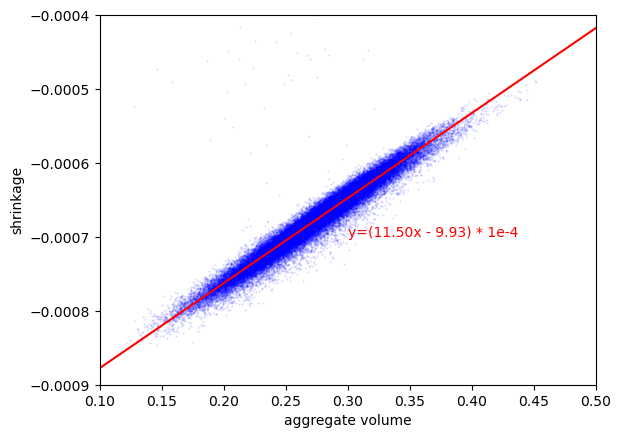

In [160]:
plt.scatter(cluster_1['aggregate_ratio'], cluster_1['shrinkage'], s=0.5, c='blue', alpha=0.1)
plt.plot(x, y, c='red')
plt.xlim([0.1, 0.5])
plt.ylim([-0.0009, -0.0004])
plt.text(0.3, -0.0007, f'y=({a[0,0]:1.2f}x - {-b[0]:1.2f}) * 1e-4', color='red')
plt.xlabel('aggregate volume')
plt.ylabel('shrinkage')

In [171]:
X = np.array(cluster_2[['aggregate_ratio', 'curve_16']])
X[:,1] = X[:,0] * X[:,1]
Y = np.array(cluster_2[['shrinkage']]) / (0.0001)
reg2 = LinearRegression().fit(X, Y)
x = np.meshgrid(np.linspace(0.2, 0.5, 10), np.linspace(0, 0.45, 10))
x = np.vstack((x[0].flatten(), x[1].flatten())).T
y = reg2.predict(x) * (0.0001)
print(reg2.score(X, Y))
a = reg2.coef_
b = reg2.intercept_

0.927080102437172


Text(0.22, 0.4, 'z = (8.82x + 1.67y - 9.77) * 1e-4')

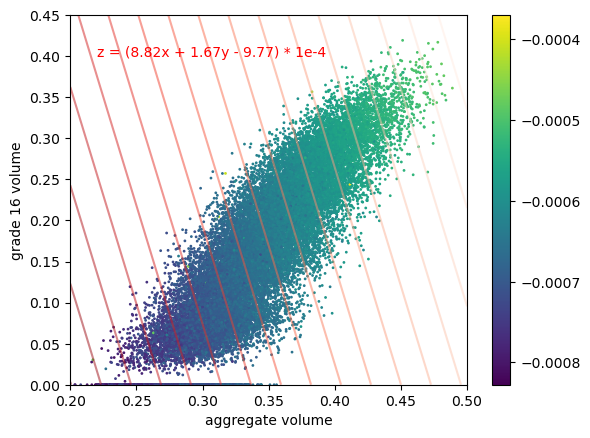

In [177]:
plt.scatter(cluster_2['aggregate_ratio'], cluster_2['curve_16']*cluster_2['aggregate_ratio'], s=1, c=cluster_2['shrinkage'])
plt.colorbar()
plt.tricontour(x[:,0], x[:,1], y.flatten(), levels=20, cmap='Reds_r', alpha=0.5)
plt.xlim([0.2, 0.5])
plt.ylim([0, 0.45])
plt.xlabel('aggregate volume')
plt.ylabel('grade 16 volume')
plt.text(0.22, 0.4, f'z = ({a[0,0]:1.2f}x + {a[0,1]:1.2f}y - {-b[0]:1.2f}) * 1e-4', color='red')

In [186]:
X = np.array(cluster_3[['aggregate_ratio', 'curve_4']])
X[:,1] = X[:,0] * X[:,1]
Y = np.array(cluster_3[['shrinkage']]) / (0.0001)
reg3 = LinearRegression().fit(X, Y)
x = np.meshgrid(np.linspace(0.25, 0.55, 10), np.linspace(0.05, 0.3, 10))
x = np.vstack((x[0].flatten(), x[1].flatten())).T
y = reg3.predict(x) * (0.0001)
print(reg3.score(X, Y))
a = reg3.coef_
b = reg3.intercept_

0.9483581842828928


Text(0.35, 0.27, 'z = (12.73x - 1.39y - 11.48) * 1e-4')

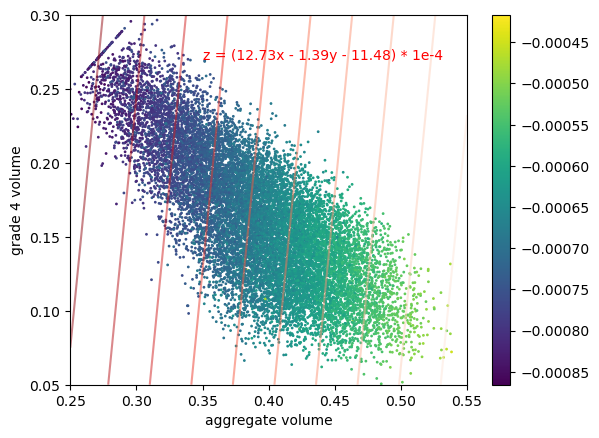

In [192]:
plt.scatter(cluster_3['aggregate_ratio'], cluster_3['curve_4']*cluster_3['aggregate_ratio'], s=1, c=cluster_3['shrinkage'])
plt.colorbar()
plt.tricontour(x[:,0], x[:,1], y.flatten(), levels=10, cmap='Reds_r', alpha=0.5)
plt.xlim([0.25, 0.55])
plt.ylim([0.05, 0.3])
plt.xlabel('aggregate volume')
plt.ylabel('grade 4 volume')
plt.text(0.35, 0.27, f'z = ({a[0,0]:1.2f}x - {-a[0,1]:1.2f}y - {-b[0]:1.2f}) * 1e-4', color='red')